In [2]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_sample = pd.read_csv('DataSample__201709211530.csv')
data_sample2 = pd.read_csv('DataSample__201710061552.csv',dtype={"value": str})
#data_sample2['value'] = pd.to_numeric(data_sample2['value'],errors='coerce')
#data_sample['value'] = pd.to_numeric(data_sample['value'],errors='coerce')
data_sample = data_sample.append(data_sample2)
data_sample['startDate'] = pd.to_datetime(data_sample['startDate'])
data_sample['owner'].replace('00000000-5854-8d6f-b8eb-cf14a0f795df','00000000-56ff-538b-2223-e1800b5e3ddb',inplace=True)


types = data_sample['type'].unique()
types

for t in types:
    f = lambda x: float(x.replace(',',''))
    # checks if the values contain decimal points, and uses a float conversion if so
    for v in data_sample.loc[data_sample['type'] == t, 'value'].head():
        if '.' in v:
            f = lambda x: float(x.replace(',',''))
            break
    data_sample.loc[data_sample['type'] == t, 'value'] = data_sample.loc[data_sample['type'] == t, 'value'].map(f)
for col in ['startDate', 'endDate', 'createdAt', 'updatedAt']:
    data_sample[col] = pd.to_datetime(data_sample[col], format='%Y-%m-%d %X')
to_tdelta = lambda row: row['endDate'] - row['startDate']
data_sample['duration'] = data_sample.apply(to_tdelta, axis=1)
data_sample['day_of_week'] = data_sample['startDate'].dt.dayofweek
data_sample.head() #0 - 6 is monday - sunday 

,_id,owner,source,sourceId,sourceName,type,startDate,endDate,value,content,originalData,createdAt,updatedAt,duration,day_of_week
0,1ff0fb89-6e1b-4601-84d0-98c79fdc5f2e,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,A1DB680E-F9C4-4FA4-8818-1D35E398B5F0,Health Mate,health-bmi,2014-08-27 21:41:23,2014-08-27 21:41:23,26.7387,NaN,NaN,2017-08-31 11:20:49,2017-08-31 11:20:49,0 days,2
1,78219621-1da4-4e3b-87bc-f4885718c63f,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,2030515A-1C70-40F3-8470-BDE99ABFC906,Health Mate,health-weight,2014-08-27 21:41:23,2014-08-27 21:41:23,71.042,NaN,NaN,2017-08-31 11:20:58,2017-08-31 11:20:58,0 days,2
2,2d917e7e-0844-4f52-b15e-2a5346c96dda,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,96D21A44-67D7-412D-BF3A-543819A8EBF0,Health Mate,health-bmi,2014-08-28 06:24:53,2014-08-28 06:24:53,26.5866,NaN,NaN,2017-08-31 11:20:49,2017-08-31 11:20:49,0 days,3
3,ab800f4b-bef7-434e-8e57-e0fccc44bfb7,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,5D73FD9D-17E1-480C-9235-3E5036503E6A,Health Mate,health-body-fat,2014-08-28 06:24:53,2014-08-28 06:24:53,0.258699,NaN,NaN,2017-08-31 11:20:53,2017-08-31 11:20:53,0 days,3
4,fb2a0865-17c3-4ac0-a782-749cc7befe12,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,5A9AB03C-30C9-43B9-9742-02E237A6F36D,Health Mate,health-weight,2014-08-28 06:24:53,2014-08-28 06:24:53,70.638,NaN,NaN,2017-08-31 11:20:58,2017-08-31 11:20:58,0 days,3


# Sleep 

In [ ]:
#Sleep -Lucas 
    #How long are they sleeping per day, what day highest/lowest - Matt
    #Disturbances during night - Matt 
    #Compared to national average - Matt
    # Correlate amount of sleep with avg steps - Matt 

### put code here

# Steps

In [ ]:
#Steps - Sebastian/Matt
    #What day do you step the most? Least? 
    #What time of day do you step the most? 
    #What is the correlation between steps and sleep?
    #What is the correlation between avg steps and BMI/Weight/Heart Rate/Body Fat/ by months? 
    #On what days of the week is the user taking less steps than their average? Less than average of other users? 
     
#Next Steps     

### code 

# Heart Rate

In [ ]:
#Heart-Rate - John
    #Heart Rate over time. 
    #In the past 90 days, average heart rate rates
    #Heart rate max/min past 90 days 
    #Is your heart rate lower/higher than the national average? 
    
#Next Steps  
    

### code 

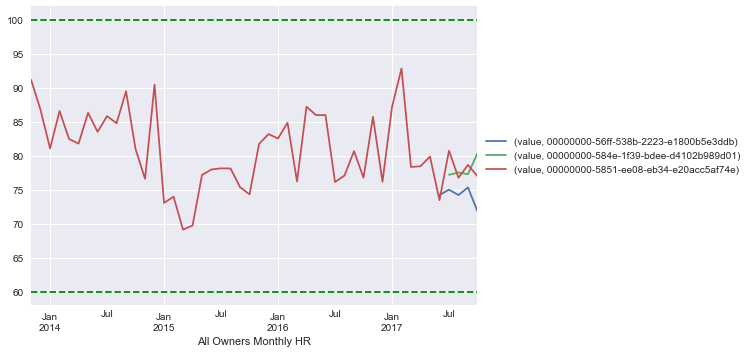

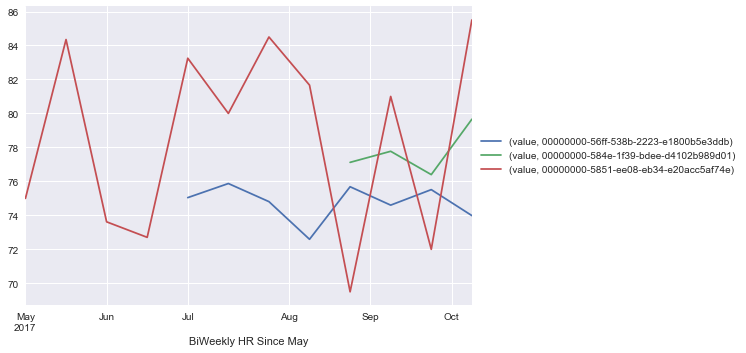

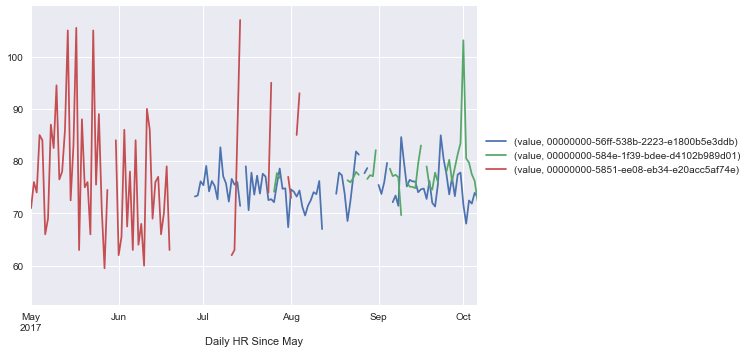

In [4]:
heartrate_df = data_sample[data_sample['type'] == 'health-heart-rate']  
heartrate_df.index = heartrate_df['startDate']
national_avg_lower = 60
national_avg_upper = 100

#Heart Rate Over Time for Users

heartrate_df['value'] = pd.Series(heartrate_df['value']).convert_objects(convert_numeric=True)
heartrate_df.loc[:,['owner','value','startDate']].groupby(['owner','startDate']).mean().unstack(level=0).resample('M').mean().plot()   
plt.axhline(y=national_avg_lower, color='g', linestyle='--')
#plt.text(y=national_avg_lower,s='normal HR lower range',rotation=90,x=0)
plt.axhline(y=national_avg_upper, color='g', linestyle='--')
#plt.text(y=national_avg_upper,s='normal HR upper range',rotation=90,x=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('All Owners Monthly HR')


#Heart Rate Since May 
May = pd.Timestamp('20170501')
heartrate_df_jan = heartrate_df[heartrate_df['startDate'] > May]
heartrate_df_jan.loc[:,['owner','value','startDate']].groupby(['owner','startDate']).mean().unstack(level=0).resample('2W').mean().plot()   
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('BiWeekly HR Since May')

heartrate_df_jan = heartrate_df[heartrate_df['startDate'] > May]
heartrate_df_jan.loc[:,['owner','value','startDate']].groupby(['owner','startDate']).mean().unstack(level=0).resample('D').mean().plot()   
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Daily HR Since May')

In [5]:
#Looking @ Statistics in the Past 90 Days 
drange = datetime.datetime.today() - pd.Timedelta(days=90)
heart_rate_90days = data_sample[(data_sample['type'] == 'health-heart-rate') & (data_sample['startDate'] > drange)]
heart_rate_90days['value'] = pd.Series(heart_rate_90days['value']).convert_objects(convert_numeric=True)
heart_rate_90days.reset_index()
heart_rate_90days.groupby('owner',as_index=False).agg({
    'value':
    {'HR sum':'sum',
     'HR avg':'mean',
     'HR max':'max',
     'HR min':'min',
     'HR count':'count',
    'HR STD':'std'}})


owner      value                           \
                                            HR sum     HR avg HR max HR min   
0  00000000-56ff-538b-2223-e1800b5e3ddb  1341773.0  74.497418  131.0   32.0   
1  00000000-584e-1f39-bdee-d4102b989d01   462063.0  77.749117  138.0   48.0   
2  00000000-5851-ee08-eb34-e20acc5af74e     1593.0  79.650000  107.0   55.0   

                       
  HR count     HR STD  
0    18011  11.253819  
1     5943   8.243853  
2       20  12.196958

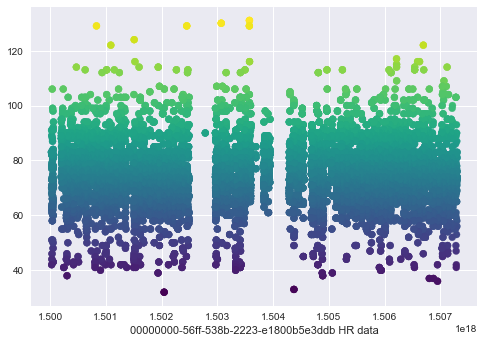

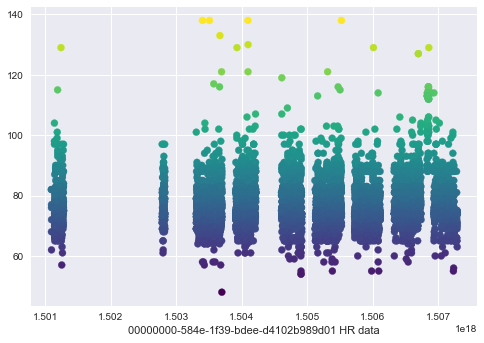

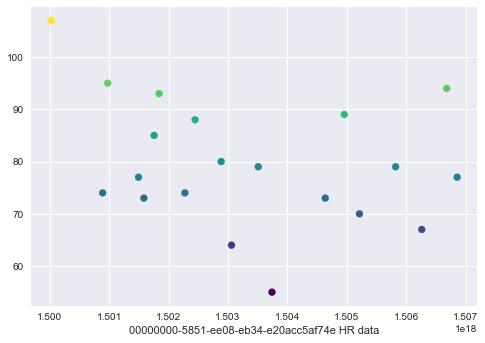

In [6]:
#Individual Plotting & Information  
heart_rate_90days = data_sample[(data_sample['type'] == 'health-heart-rate') & (data_sample['startDate'] > drange)]
heart_rate_90days.index = heart_rate_90days['startDate']
heart_rate_90days['value'] = pd.Series(heart_rate_90days['value']).convert_objects(convert_numeric=True)
heart_rate_90days['ts'] = heart_rate_90days['startDate'].dt.values.astype(np.int64) #// 10 ** 9


def HR_graph(owner): #punch in an owners id, will graph HR avg past 90 days
    muj = heart_rate_90days[heart_rate_90days['owner'] == owner]
    x = plt.scatter('ts', 'value', data=muj,c='value',cmap='viridis')
    plt.xlabel(owner + ' HR data')
    plt.show()
    return x


for i in heart_rate_90days['owner'].unique():
    HR_graph(i)

# BMI/Body Fat/Weight

In [ ]:
#Bmi/Body Fat/Weight -Luqmaan/Aydin 
    #How has BMI 
    #BMI average versus others 
    #BMI rate of change compared to other people's rates of change 
    #Weight over time/lowest weight/highest weight 
    #biggest weight change in a month span 
    #Weight change correlated with avg steps. Does avg steps imply more weight loss?
    
#Next Steps 

### code 